In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Comparison and assessment of GRN inference methods

## Load GRNs inferences
+ Load the rankings/scores provided by different methods, let $M$ be the number of "methods".
+ Concatenate the rankings use the `pandas.concat` function

__Check the `pandas.concat` example:__

In [3]:
# create a dummy dataframe a
a = pd.DataFrame()
a["score_method1"] = [1,2,3]
a.index = ["a","b","c"]
# create a dummy dataframe b
b = pd.DataFrame()
b["score_method2"] = [10,20,30]
b.index = ["c","b","a"]
# create a dummy dataframe c
c = pd.DataFrame()
c["score_method3"] = [100,200,300]
c.index = ["a","c","b"]
# join the three dummy datasets
join_df = pd.concat([a,b,c], axis=1,sort=True) # axis=1 for rows and axis=0 for columns
join_df

,score_method1,score_method2,score_method3
a,1,30,100
b,2,20,300
c,3,10,200


+ It could be usefull to set the index of each ranking in the following format: "TFid_TGid"

__Check the index modification example:__

In [4]:
# Create a dummy ranking dataframe
ranking = pd.DataFrame()
ranking["TF"] = ["tfa","tfb","tfc"]
ranking["TG"] = ["tga","tgb","tgc"]
ranking["score"] = [0.9,0.2,0.1]
ranking["rank"] = [0,1,2]
# Change the index
ranking.index = ranking["TF"] + "_" + ranking["TG"]
ranking

,TF,TG,score,rank
tfa_tga,tfa,tga,0.9,0
tfb_tgb,tfb,tgb,0.2,1
tfc_tgc,tfc,tgc,0.1,2


## Load "High Confidence" GRN

Let an oriented graph $GRN_{HC} = \langle V_{HC}, E_{HC} \rangle$ denote the "high confidence" GRN presented in [Poitier et al. 2014](https://www.sciencedirect.com/science/article/pii/S2211124714010043), where $V_{HC}$ denotes the set of nodes (genes) and $E_{HC}$ denotes the set of edges (regulatory relationships).

+ Load the "high confidence" GRN
+ Set the index (as in the previous step).
+ Select only the edges that involve highly expressed genes (those that you have used to infer your GRNs)

## Compare methods

+ Represent the correlation between the different methods using a heatmap 

+ Generate a [dendogram](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) or a [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html) using the ranking or the score vectors   

 + Compare the top $k$ links of each method using the [Jaccard similarity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_similarity_score.html), represent the results in a matrix

+ For each method, keep only the edges that are reported in the "high confidence" GRN.
+ Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to the rankings of the methods for the chosen links, keep 3 dimensions, and the location of each method in this new space (you go from $M$ points in a $|E_{HC}|$-th dimensional space to $M$ points in a 3D space ). 

__Check the following example:__

Dummy ranking:
       method0  method1  method2  method3  method4  method5  method6  method7  \
edge0      327      924      545       53      740       27      755      108   
edge1      247      908      773      376      189       69      191      536   
edge2      185      115      305      833      433      500      747      997   
edge3      504      206      287      403      203      862      221      538   
edge4      323      449      549      438      388      573       85      539   

       method8  method9  
edge0      213      936  
edge1      138      166  
edge2      686      496  
edge3      511      306  
edge4      573      441  

Explained variance ratio for each PC
[0.16138035 0.1454675 ]


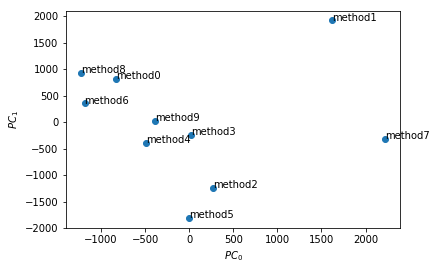

In [5]:
# create a dummy join ranking of 10 methods and 100 edges
rankings = pd.DataFrame(np.random.randint(0,1000,size=(100,10)))
rankings.columns = ["method"+str(i) for i in rankings.columns]
rankings.index = ["edge"+str(i) for i in rankings.index]
print("Dummy ranking:")
print(rankings.head())
# transpose the ranking matrix
rankingsT = rankings.T
# import PCA
from sklearn.decomposition import PCA
# create PCA object with k principal axis
k = 2
pca = PCA(n_components=k)
# Apply the PCA
rankingsT_pca = pca.fit_transform(rankingsT)
# Explained variance ratio for each principal axis
print("\nExplained variance ratio for each PC")
print(pca.explained_variance_ratio_)
# plot the coordinates of each method along the Principal Axis
plt.plot(rankingsT_pca[:,0],rankingsT_pca[:,1],"o")
plt.xlabel("$PC_0$")
plt.ylabel("$PC_1$")
for i,method in enumerate(rankingsT.index):
    plt.text(x=rankingsT_pca[i,0], y=rankingsT_pca[i,1], s=method)

## Answer the following questions:
+ How different are the distinct methods between them?
+ Which methods are more similar between them?

## Assess the quality of the inferred GRNs
In this section we are going to use the following quality measures to evaluate the inferred GRNs with respect to the "High Confidence" GRN:

+ [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
+ [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
+ [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

These measures are defined using the __confusion matrix__
$$ConfMat=\begin{pmatrix}& T_{real} & F_{real}\\T_{pred}& TP & FP \\F_{pred} & FN & TN \end{pmatrix}$$

__Where__:
+ $TP$: True positive (correctly predicted as True)
+ $FP$: False positive (wrongly predicted as True)
+ $FN$: False negative (wrongly predicted as False)
+ $TN$: True negative (correctly predicted as False)

__Metrics__:
+ $Recall = \frac{TP}{TP + FN}$
+ $Precision = \frac{TP}{TP + FP}$
+ $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

__Bonus__:
You can also use the follwing evaluation criteria:
+ [ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
+ [AUC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
+ [Average Precision Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score)

+ Select the to $k = |E_{HC}|$ best edges for each method
+ Evaluate the different results with respect to the "High Confidence" GRN using the previous measures
+ Which are the best methods, w.r.t. this dataset? Explain

# Build a meta learner
In [Marbach et al. 2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3512113/), the authors have suggest that "no single inference method performs optimally across all datasets. In contrast, integration of predictions from multiple inference methods shows robust and high performance across diverse datasets"

+ Compute a new GRN by averaging the ranks of the different methods. 

+ Compute the similarity of this new GRN w.r.t. the previous ones

+ Compute the quality of this new GRN

+ Let $X^{rank}$ be a matrix with $E$ rows (one for each edge) and $M$ columns (one for each method). The value $X^{rank}_{i,j}$ is the rank that method $j$ has attributed to edge $i$. 
+ Let $y$ be a binary label vector with $E$ rows (one for each edge), s.t. $y_e=1$ if $e \in E_{HC}$ and $y_e=0$ otherwise
+ Train a Random Forest classifier to predict $y$, from the values $X_{rank}$
+ Extract the feature importance from this classifier to infer which are the better methods

__Check the following example:__

In [6]:
# create a dummy join ranking of 10 methods and 100 edges
rankings = pd.DataFrame(np.random.randint(0,1000,size=(100,10)))
rankings.columns = ["method"+str(i) for i in rankings.columns]
rankings.index = ["edge"+str(i) for i in rankings.index]
print("Dummy ranking:")
print(rankings.head())
# create dummy $y$ vector (binary labels)
y = pd.DataFrame()
y["labels"] = np.random.binomial(p=0.5,n=1,size=100)
y.index = rankings.index
print("\nDummy labels:")
print(y.head())
# Train the RF classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(rankings,y["labels"])
rf.feature_importances_

Dummy ranking:
       method0  method1  method2  method3  method4  method5  method6  method7  \
edge0        7      320       25      672      333      413      487      657   
edge1       86      444      726      745      502      224       11      610   
edge2      569      849      788      281      921      207      329      700   
edge3      190      531      193      827      744       45      160      813   
edge4      712      344      347      893      817      409      785      823   

       method8  method9  
edge0      953      692  
edge1      847      820  
edge2       57      614  
edge3      648      480  
edge4      899      420  

Dummy labels:
       labels
edge0       1
edge1       1
edge2       0
edge3       0
edge4       1


array([0.08026446, 0.10601871, 0.08706498, 0.09726857, 0.1003492 ,
       0.09425878, 0.15110857, 0.0748779 , 0.08805547, 0.12073336])

__Question__: Since this method belongs to a supervised learning cathegory, how could you test its performance?
